```
Regression Modeling in Practice Course
Wesleyan University

Linear Regression Model
Mario Colosso V.

The sample comes from Cortez and Morais study about predicting forest fires using 
metereological data [Cortez and Morais, 2007]. The study includes data from 517
forest fires in the Natural Park Montesinho (Trás-os-Montes, in northeastern Portugal)
January 2000 to December 2003, including meteorological data, the type of vegetation
involved (which determines the six components of the Canadian Forest Fire Weather Index
(FWI) system --see below--) and the total burned area in order to generate a model capable
of predicting the burned area of small fires, which are more frequent.

Measures
The data contains:
* X, Y: location of the fire (x,y axis spatial coordinate within the Montesinho park map:
  from 1 to 9)
* month, day: month and day of the week the fire occurred (january to december and monday
  to sunday)
* FWI system components:
  - FFMC: Fine Fuel Moisture Code (numeric rating of the moisture content of litter and
    other cured fine fuels: 18.7 to 96.2)
  - DMC: Duff Moisture Code (numeric rating of the average moisture content of loosely
    compacted organic layers of moderate depth: 1.1 to 291.3)
  - DC: Drought Code (numeric rating of the average moisture content of deep, compact
    organic layers: 7.9 to 860.6)
  - ISI: Initial Spread Index (numeric rating of the expected rate of fire spread: 0.0
    to 56.1)
* Metereological variables:
  - temp: temperature (2.2 to 33.3 °C)
  - RH: relative humidity (15 to 100%)
  - wind: wind speed (0.4 to 9.4 Km/h)
  - rain: outside rain (0.0 to 6.4 mm/m^2)
* area: the burned area of the forest as response variable (0.0 to 1090.84 Ha).

```

# Forest Fires

## Import required libraries and set global options

In [1]:
%matplotlib inline

import pandas
import matplotlib.pyplot as plt
import seaborn
import statsmodels.api as sm
import statsmodels.formula.api as smf
from pandas.tools.plotting import scatter_matrix
from math import ceil

pandas.set_option('display.float_format', lambda x:'%.3f'%x)
#pandas.set_option('display.mpl_style', 'default')   # --deprecated
plt.style.use('ggplot')   # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 5)

## Load Forest Fires .csv file

In [2]:
fires = pandas.read_csv('forestfires.csv')

# Data Exploration

In [3]:
fires.head()   #Show first rows

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.200,26.200,94.300,5.100,8.200,51,6.700,0.000,0.000
1,7,4,oct,tue,90.600,35.400,669.100,6.700,18.000,33,0.900,0.000,0.000
2,7,4,oct,sat,90.600,43.700,686.900,6.700,14.600,33,1.300,0.000,0.000
3,8,6,mar,fri,91.700,33.300,77.500,9.000,8.300,97,4.000,0.200,0.000
4,8,6,mar,sun,89.300,51.300,102.200,9.600,11.400,99,1.800,0.000,0.000


## Get some descriptive statistic of the data

In [4]:
fires_attributes = fires.columns.values.tolist()
number_of_columns = len(fires_attributes)

In [5]:
fires.describe()   #Original data

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000,517.000,517.000,517.000,517.000,517.000,517.000,517.000,517.000,517.000,517.000
mean,4.669,4.300,90.645,110.872,547.940,9.022,18.889,44.288,4.018,0.022,12.847
std,2.314,1.230,5.520,64.046,248.066,4.559,5.807,16.317,1.792,0.296,63.656
min,1.000,2.000,18.700,1.100,7.900,0.000,2.200,15.000,0.400,0.000,0.000
25%,3.000,4.000,90.200,68.600,437.700,6.500,15.500,33.000,2.700,0.000,0.000
50%,4.000,4.000,91.600,108.300,664.200,8.400,19.300,42.000,4.000,0.000,0.520
75%,7.000,5.000,92.900,142.400,713.900,10.800,22.800,53.000,4.900,0.000,6.570
max,9.000,9.000,96.200,291.300,860.600,56.100,33.300,100.000,9.400,6.400,1090.840


## Display a graph of quantitative variables vs area

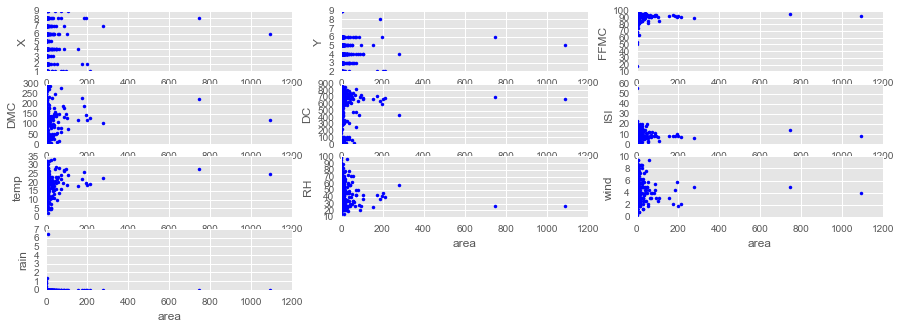

In [6]:
attributes = [0, 1] + list(range(4, number_of_columns - 1))
n_cols = 3
n_rows = int(ceil(len(attributes) / n_cols))
fig = plt.figure()
idx = 1
for attr in attributes:
    plt.subplot(n_rows, n_cols, idx)
    plt.plot(fires['area'], fires[fires_attributes[attr]], 'b.')
#    seaborn.regplot(x = fires['area'], y = fires[fires_attributes[attr]], 
#                    scatter = True, color = 'b', data = fires)
    plt.xlabel('area')
    plt.ylabel(fires_attributes[attr])
    idx += 1

plt.show()

**There are some data values where the burned area is away from other values:**

In [7]:
fires[fires['area'] > 250]

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
238,6,5,sep,sat,92.500,121.100,674.400,8.600,25.100,27,4.000,0.000,1090.840
415,8,6,aug,thu,94.800,222.400,698.600,13.900,27.500,27,4.900,0.000,746.280
479,7,4,jul,mon,89.200,103.900,431.600,6.400,22.600,57,4.900,0.000,278.530


## Plot some other variables

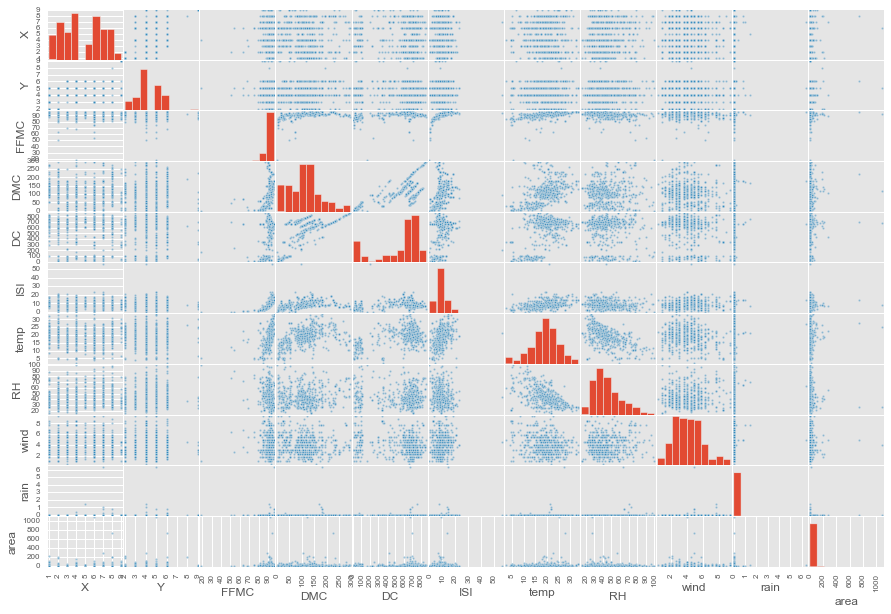

In [8]:
scatter_matrix(fires, figsize = (15,10))
plt.show()

High bias are appreciated in **FFMC**, **DC**, **ISI**, **wind** and **area** variables

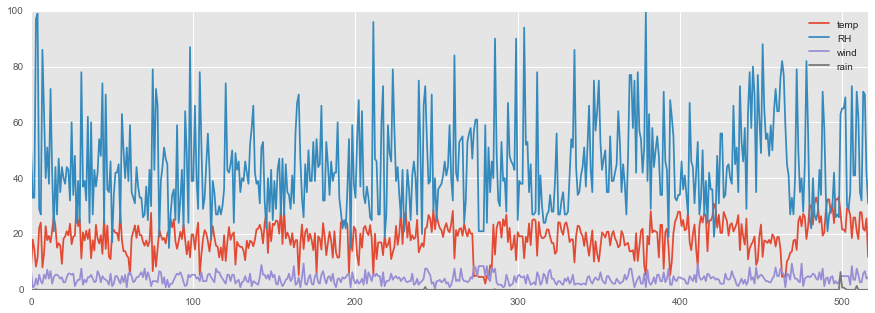

In [9]:
fires[['temp', 'RH', 'wind', 'rain']].plot()   #Plot temperature, relative humidity, wind 
                                               #and rain graphs

In [10]:
fires.corr()   #Show correlation between variables

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,1.000,0.540,-0.021,-0.048,-0.086,0.006,-0.051,0.085,0.019,0.065,0.063
Y,0.540,1.000,-0.046,0.008,-0.101,-0.024,-0.024,0.062,-0.020,0.033,0.045
FFMC,-0.021,-0.046,1.000,0.383,0.331,0.532,0.432,-0.301,-0.028,0.057,0.040
DMC,-0.048,0.008,0.383,1.000,0.682,0.305,0.470,0.074,-0.105,0.075,0.073
DC,-0.086,-0.101,0.331,0.682,1.000,0.229,0.496,-0.039,-0.203,0.036,0.049
ISI,0.006,-0.024,0.532,0.305,0.229,1.000,0.394,-0.133,0.107,0.068,0.008
temp,-0.051,-0.024,0.432,0.470,0.496,0.394,1.000,-0.527,-0.227,0.069,0.098
RH,0.085,0.062,-0.301,0.074,-0.039,-0.133,-0.527,1.000,0.069,0.100,-0.076
wind,0.019,-0.020,-0.028,-0.105,-0.203,0.107,-0.227,0.069,1.000,0.061,0.012
rain,0.065,0.033,0.057,0.075,0.036,0.068,0.069,0.100,0.061,1.000,-0.007


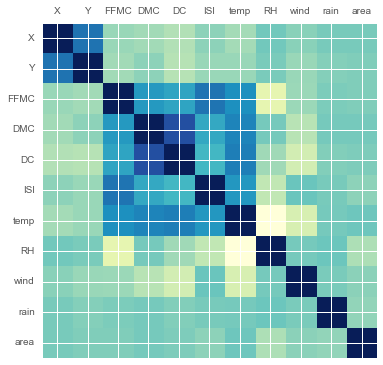

In [11]:
def plot_corr(df, size=10):
    '''Function plots a graphical correlation matrix for each pair of columns
       in the dataframe, including the names of the attributes
    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot
    
    Code taken from:
    http://stackoverflow.com/questions/29432629/correlation-matrix-using-pandas
    '''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr, cmap = 'YlGnBu')
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);

#plt.matshow(fires.corr())
plot_corr(fires, size = 6)

There is a medium-high correlation (**0.682**) between **DC** (Drought Code: numeric rating of the average moisture content of deep, compact organic layers) and **DMC** (Duff Moisture Code: numeric rating of the average moisture content of loosely compacted organic layers of moderate depth) and medium correlation (**0.532**) between **ISI** (Initial Spread Index: numeric rating of the expected rate of fire spread) and **FFMC** (Fine Fuel Moisture Code: numeric rating of the moisture content of litter and other cured fine fuels). Also, there is a inverse medium  correlation (**-0.527**) between temperature (**temp**) and relative humidity (**RH**). Other relationships are noted between temperature (**temp**) and FWI system components (**FFMC**, **DCM**, **DC** and **ISI**)

# Linear regression

## Convert categorical variables (months and days) into numerical values

In [12]:
months_table = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 
                'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
days_table =   ['sun', 'mon', 'tue', 'wed', 'thu', 'fri', 'sat']

fires['month'] = [months_table.index(month) for month in fires['month'] ]
fires['day'] =   [days_table.index(day)     for day   in fires['day']   ]

fires['X'] -= 1
fires['Y'] -= 2

fires.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,6,3,2,5,86.200,26.200,94.300,5.100,8.200,51,6.700,0.000,0.000
1,6,2,9,2,90.600,35.400,669.100,6.700,18.000,33,0.900,0.000,0.000
2,6,2,9,6,90.600,43.700,686.900,6.700,14.600,33,1.300,0.000,0.000
3,7,4,2,5,91.700,33.300,77.500,9.000,8.300,97,4.000,0.200,0.000
4,7,4,2,0,89.300,51.300,102.200,9.600,11.400,99,1.800,0.000,0.000


## Center each explanatory variable

In [13]:
for idx in list(range(4, number_of_columns - 1)):   #Exclude categorical variables
    fires[fires_attributes[idx]] = fires[fires_attributes[idx]] - \
                                   fires[fires_attributes[idx]].mean()

In [14]:
fires.describe()   #Only quantitative explanatory variables (FFMC thru rain) were centered

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000,517.000,517.000,517.000,517.000,517.000,517.000,517.000,517.000,517.000,517.000,517.000,517.000
mean,3.669,2.300,6.476,2.973,0.000,-0.000,0.000,-0.000,0.000,0.000,-0.000,0.000,12.847
std,2.314,1.230,2.276,2.144,5.520,64.046,248.066,4.559,5.807,16.317,1.792,0.296,63.656
min,0.000,0.000,0.000,0.000,-71.945,-109.772,-540.040,-9.022,-16.689,-29.288,-3.618,-0.022,0.000
25%,2.000,2.000,6.000,1.000,-0.445,-42.272,-110.240,-2.522,-3.389,-11.288,-1.318,-0.022,0.000
50%,3.000,2.000,7.000,3.000,0.955,-2.572,116.260,-0.622,0.411,-2.288,-0.018,-0.022,0.520
75%,6.000,3.000,8.000,5.000,2.255,31.528,165.960,1.778,3.911,8.712,0.882,-0.022,6.570
max,8.000,7.000,11.000,6.000,5.555,180.428,312.660,47.078,14.411,55.712,5.382,6.378,1090.840


## Generate models to test each variable

In [15]:
def print_title(title):
    print('+' + "-" * (len(title) + 2) + '+' + '\n' + 
          '| ' + title + ' |' + '\n' + 
          '+' + "-" * (len(title) + 2) + '+')

In [16]:
statistics = list()
for idx in range(0, number_of_columns - 1):
    model = smf.ols(formula = "area ~ " + 
                    fires_attributes[idx], data = fires).fit()
    
    print_title('Model: area ~ ' + fires_attributes[idx])
    print()
    print(model.summary())
    print()
    statistics.append([model.f_pvalue, model.rsquared])

+-----------------+
| Model: area ~ X |
+-----------------+

                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.077
Date:                Tue, 14 Jun 2016   Prob (F-statistic):              0.150
Time:                        22:34:25   Log-Likelihood:                -2879.4
No. Observations:                 517   AIC:                             5763.
Df Residuals:                     515   BIC:                             5771.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------

### Summary:

In [17]:
statistics = pandas.DataFrame(statistics, 
                              index=fires_attributes[: number_of_columns - 1], 
                              columns=['p-value', 'R-squared'])
statistics.T

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
p-value,0.150,0.309,0.200,0.272,0.363,0.097,0.262,0.851,0.026,0.086,0.780,0.867
R-squared,0.004,0.002,0.003,0.002,0.002,0.005,0.002,0.000,0.010,0.006,0.000,0.000


In [18]:
statistics[statistics['p-value'] < 0.05]

,p-value,R-squared
temp,0.026,0.010


**'temp' is the only statistically significant variable (p-value = 0.026) but it only explains the 1% of forest fires.** Let's show its linear model summary:

In [19]:
print((smf.ols(formula = "area ~ temp", data = fires).fit()).summary())

                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     4.978
Date:                Tue, 14 Jun 2016   Prob (F-statistic):             0.0261
Time:                        22:34:26   Log-Likelihood:                -2878.0
No. Observations:                 517   AIC:                             5760.
Df Residuals:                     515   BIC:                             5768.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     12.8473      2.789      4.607      0.0

**The results of the linear regression models indicated than only temperature (Beta = 1.0726, p = 0.026, $R^2$ = 0.010) was significantly and positively associated with the total burned area due to forest fires. _'p-value'_ of other models are greater than treshold value of 0.05 so results are not statistically significant to reject null hypothesis.**

## Create a Linear Regression Model for a combination of all variables

In [20]:
explanatory_variables = "X + Y + month + day + FFMC + DMC + DC + ISI + temp + RH + " + \
                        "wind + rain"
response_variable =     "area"

model = smf.ols(formula = response_variable + " ~ " + explanatory_variables, 
                data = fires).fit()

In [21]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.092
Date:                Tue, 14 Jun 2016   Prob (F-statistic):              0.364
Time:                        22:34:27   Log-Likelihood:                -2873.8
No. Observations:                 517   AIC:                             5774.
Df Residuals:                     504   BIC:                             5829.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -17.5974     19.340     -0.910      0.3

**_p-value_ of combination model (p = 0.410) is bigger than treshold value, so the combination of the Canadian Forest Fire Weather Index (FWI) system plus temperature, humidity, wind and rain are not significantly associated with the total burned area due to forest fires. _p-value_ of temperature in combination model (p = 0.282) is not longer statistically significant, a confounder variable?**

# Test a Multiple Regression Model

## Sort explanatory variables by p-value

In [22]:
statistics = statistics.sort_values(by='p-value')

## Define an useful function to plot QQ and Residual plots

In [23]:
def print_qqplot_and_residuals_plot(model):
    # qq-plot
    ax1 = plt.subplot(1, 3, 1)
    qq_plot = sm.qqplot(model.resid, line = 'r', ax = ax1)
    
    # Residuals plot
    ax2 = plt.subplot(1, 3, 2)
    stdres = pandas.DataFrame(model.resid_pearson)
    residuals_plot = plt.plot(stdres, 'o', ls = 'None')
    plt.axhline(y = 0, color = 'r')
    plt.ylabel('Standarized Residual')
    plt.xlabel('Observation Number')
    
    plt.show()

## Generate linear models adding one explanatory variable a time

+--------------------+
| Model: area ~ temp |
+--------------------+

                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     4.978
Date:                Tue, 14 Jun 2016   Prob (F-statistic):             0.0261
Time:                        22:34:27   Log-Likelihood:                -2878.0
No. Observations:                 517   AIC:                             5760.
Df Residuals:                     515   BIC:                             5768.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------

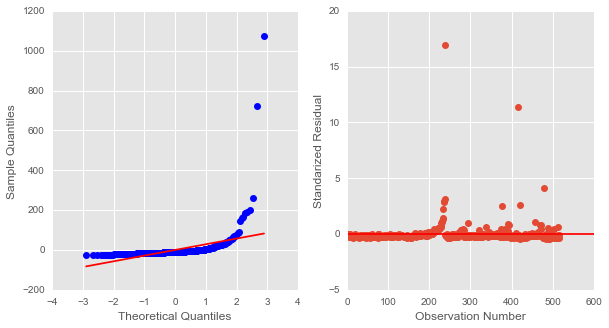


+-------------------------+
| Model: area ~ temp + RH |
+-------------------------+

                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     2.692
Date:                Tue, 14 Jun 2016   Prob (F-statistic):             0.0687
Time:                        22:34:28   Log-Likelihood:                -2877.8
No. Observations:                 517   AIC:                             5762.
Df Residuals:                     514   BIC:                             5774.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------

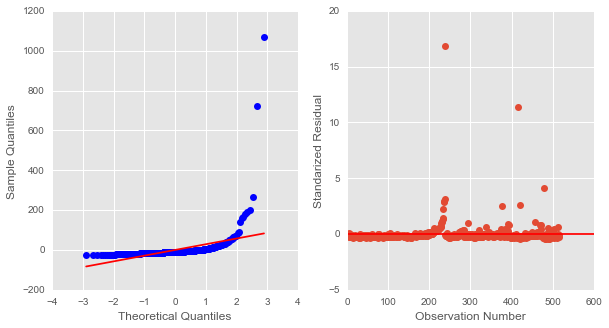


+-------------------------------+
| Model: area ~ temp + RH + DMC |
+-------------------------------+

                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     2.182
Date:                Tue, 14 Jun 2016   Prob (F-statistic):             0.0892
Time:                        22:34:29   Log-Likelihood:                -2877.2
No. Observations:                 517   AIC:                             5762.
Df Residuals:                     513   BIC:                             5779.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------

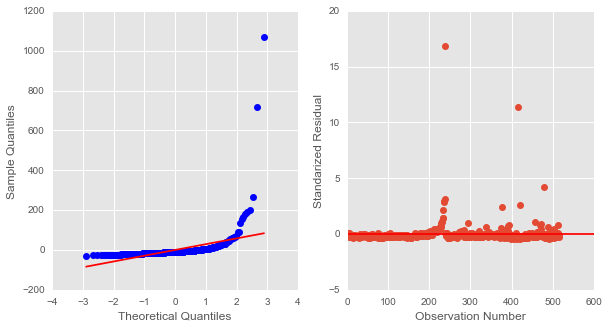


+-----------------------------------+
| Model: area ~ temp + RH + DMC + X |
+-----------------------------------+

                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     2.351
Date:                Tue, 14 Jun 2016   Prob (F-statistic):             0.0532
Time:                        22:34:30   Log-Likelihood:                -2875.7
No. Observations:                 517   AIC:                             5761.
Df Residuals:                     512   BIC:                             5783.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------

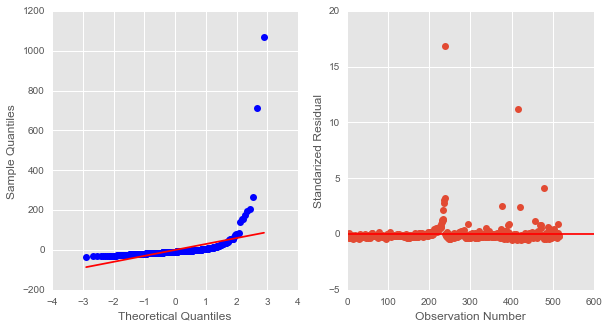


+-------------------------------------------+
| Model: area ~ temp + RH + DMC + X + month |
+-------------------------------------------+

                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     1.896
Date:                Tue, 14 Jun 2016   Prob (F-statistic):             0.0935
Time:                        22:34:31   Log-Likelihood:                -2875.7
No. Observations:                 517   AIC:                             5763.
Df Residuals:                     511   BIC:                             5789.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Con

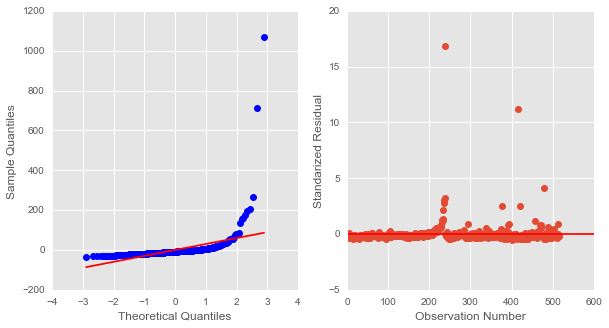


+------------------------------------------------+
| Model: area ~ temp + RH + DMC + X + month + DC |
+------------------------------------------------+

                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     1.758
Date:                Tue, 14 Jun 2016   Prob (F-statistic):              0.106
Time:                        22:34:32   Log-Likelihood:                -2875.2
No. Observations:                 517   AIC:                             5764.
Df Residuals:                     510   BIC:                             5794.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t| 

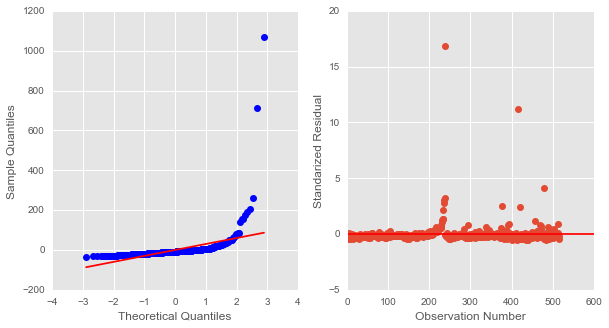


+------------------------------------------------------+
| Model: area ~ temp + RH + DMC + X + month + DC + day |
+------------------------------------------------------+

                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     1.642
Date:                Tue, 14 Jun 2016   Prob (F-statistic):              0.121
Time:                        22:34:33   Log-Likelihood:                -2874.7
No. Observations:                 517   AIC:                             5765.
Df Residuals:                     509   BIC:                             5799.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err     

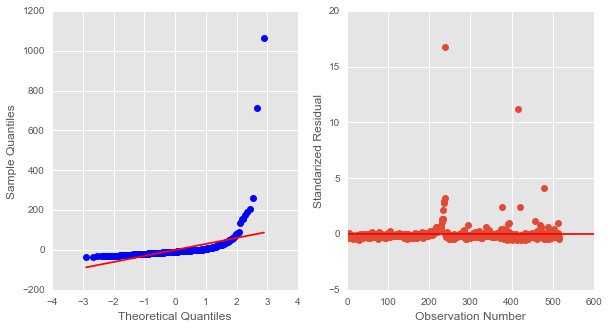


+----------------------------------------------------------+
| Model: area ~ temp + RH + DMC + X + month + DC + day + Y |
+----------------------------------------------------------+

                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.437
Date:                Tue, 14 Jun 2016   Prob (F-statistic):              0.178
Time:                        22:34:34   Log-Likelihood:                -2874.7
No. Observations:                 517   AIC:                             5767.
Df Residuals:                     508   BIC:                             5806.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    

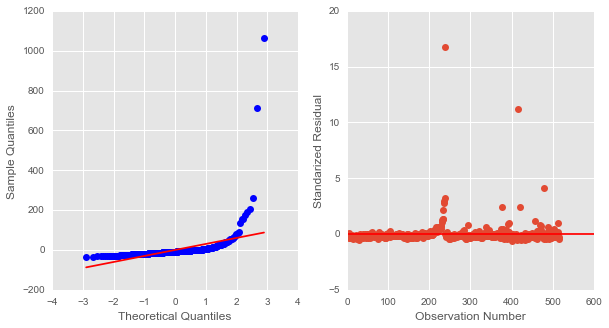


+-----------------------------------------------------------------+
| Model: area ~ temp + RH + DMC + X + month + DC + day + Y + FFMC |
+-----------------------------------------------------------------+

                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.320
Date:                Tue, 14 Jun 2016   Prob (F-statistic):              0.223
Time:                        22:34:34   Log-Likelihood:                -2874.5
No. Observations:                 517   AIC:                             5769.
Df Residuals:                     507   BIC:                             5811.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
    

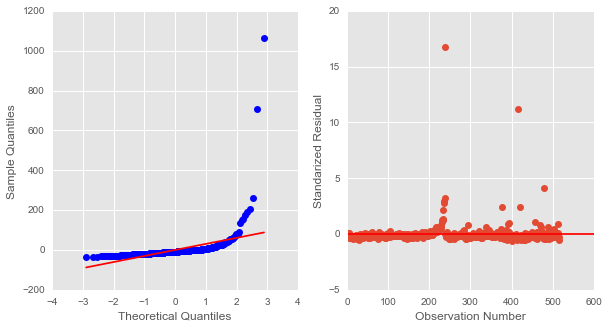


+------------------------------------------------------------------------+
| Model: area ~ temp + RH + DMC + X + month + DC + day + Y + FFMC + wind |
+------------------------------------------------------------------------+

                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.214
Date:                Tue, 14 Jun 2016   Prob (F-statistic):              0.279
Time:                        22:34:35   Log-Likelihood:                -2874.3
No. Observations:                 517   AIC:                             5771.
Df Residuals:                     506   BIC:                             5817.
Df Model:                          10                                         
Covariance Type:            nonrobust                         

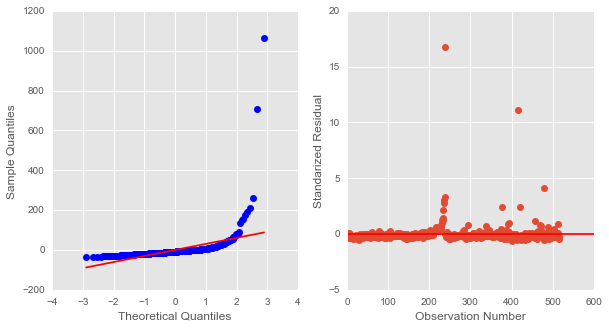


+------------------------------------------------------------------------------+
| Model: area ~ temp + RH + DMC + X + month + DC + day + Y + FFMC + wind + ISI |
+------------------------------------------------------------------------------+

                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.184
Date:                Tue, 14 Jun 2016   Prob (F-statistic):              0.295
Time:                        22:34:36   Log-Likelihood:                -2873.9
No. Observations:                 517   AIC:                             5772.
Df Residuals:                     505   BIC:                             5823.
Df Model:                          11                                         
Covariance Type:            nonrobust       

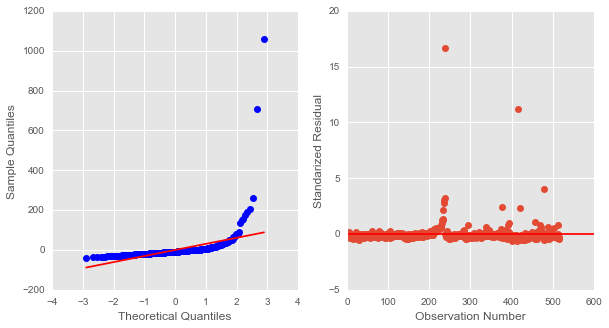


+-------------------------------------------------------------------------------------+
| Model: area ~ temp + RH + DMC + X + month + DC + day + Y + FFMC + wind + ISI + rain |
+-------------------------------------------------------------------------------------+

                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.092
Date:                Tue, 14 Jun 2016   Prob (F-statistic):              0.364
Time:                        22:34:37   Log-Likelihood:                -2873.8
No. Observations:                 517   AIC:                             5774.
Df Residuals:                     504   BIC:                             5829.
Df Model:                          12                                         
Covariance Type:       

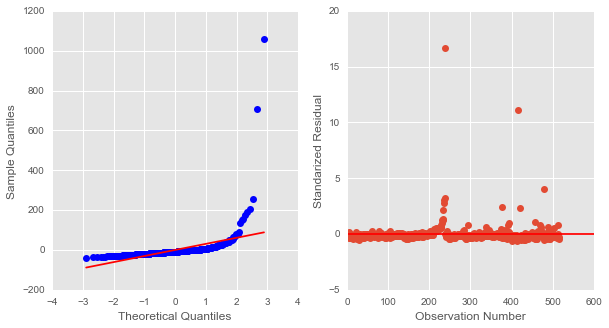

In [24]:
explanatory_variables = None
response_variable =     "area"

saved_models = list()

for variable in list(statistics[: number_of_columns - 1].index.values):
    if explanatory_variables == None:
        explanatory_variables = variable
    else:
        explanatory_variables += " + " + variable
    model = smf.ols(formula = response_variable + " ~ " + explanatory_variables, 
                    data = fires).fit()
    saved_models.append(model)
    
    print_title('Model: ' + response_variable + " ~ " + explanatory_variables)
    print()
    print(model.summary())
    print_qqplot_and_residuals_plot(model)
    print()

**From above results can be seen that after adding a second variable to the model (relative humidity --RH--), temperature --temp-- is not longer statistically significant, so its a confounder variable: "temperature increases due to forest fire, or forest fire is helped by high temperatures?"**

**In all generated models we can see the summary of the multiple regression model, the quantile-quantile plot (qq-plot), left side, which "plots the quantiles of the residuals that we would theoretically see if the residuals followed a normal distribution, against the quantiles for the residuals estimated from our regression model", and, right side, the Standarized Residuals plot, which are, "simply, the residual values transformed to have a mean of zero and a standard deviation of one"**

**The qq-plots of our regression models shows a straight line with high deviations at the lower and higher quantiles, indicating the residuals do not follow a normal distribution.**

**The Standarized Residuals plot shows there are a group of observations which standarized residuals are greather than 2 standard deviations, and more than 3 standard deviations implying the presence of extreme outliers**

In [26]:
stdres = pandas.DataFrame(saved_models[11].resid_pearson)
stdres[(stdres[0] < -2.5) | (stdres[0] > 2.5)].T

,235,236,237,238,415,479
0,2.760,3.019,3.262,16.681,11.154,4.055


**In all generated models, more than 1% of our observations has standardized residuals with an absolute value greater than 2.5, then there is evidence that the level of error within our model is unacceptable. That is the model is a fairly poor fit to the observed data.**

In [27]:
pct_outliers = list()
for idx in range(len(saved_models)):
    stdres = pandas.DataFrame(saved_models[idx].resid_pearson)
    pct_outliers.append(round(len(stdres[(stdres[0] < -2.5) | (stdres[0] > 2.5)]) / len(fires), 3))

print(pct_outliers)

[0.015, 0.015, 0.014, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012]


**The second warning of full model indicates "The condition number is large, 1.76e+03. This might indicate that there are strong multicollinearity or other numerical problems", as it could be expected.**

**During data exploration we found that there is a medium to medium-high correlation between the average moisture content of deep, compact organic layers and the average moisture content of loosely compacted organic layers of moderate depth (DC-DMC: 0.682) and between the expected rate of fire spread and the moisture content of litter and other cured fine fuels (ISI- FFMC: 0.532). Also, there is a inverse medium correlation (-0.527) between temperature (temp) and relative humidity (RH). Other relationships are noted between temperature (temp) and FWI system components (FFMC, DCM, DC and ISI)**

## Leverage plot

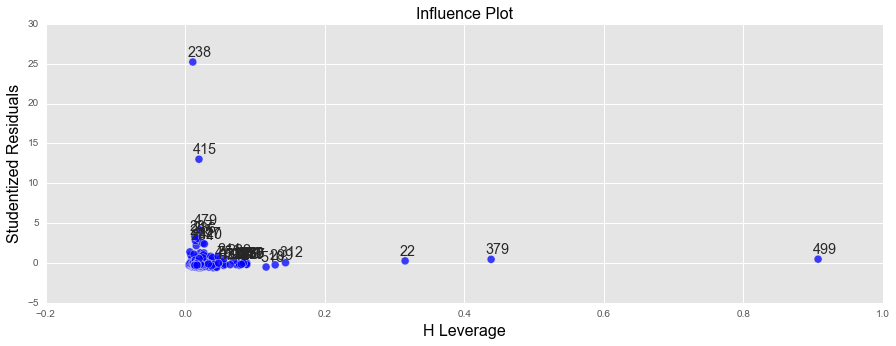

In [29]:
sm.graphics.influence_plot(model, size=8) #Leverage plot for full model
plt.show()

**Leverage plot permits identify observations that have an unusually large influence on the estimation of the predicted value of the response variable, burned area, or that are outliers, or both. The graph of full model shows one observation with a very high influence (observation 499, with near 90%), one with medium influence (observation 379, with near 45%) and one with medium-low influence (observation 22, with near 32%). The rest of the observations have influence under 20%**

**The graph of full model also show us a group of ouliers. Note this extreme outliers are the same observations we found during data exploration: 238, 415, 479, plus a cloud of minor outliers (residuals outside range -2 to 2 standard deviations), but with low influence (< 5%) on the estimation of the regression model**

**No observations in this data are both high leverage and outliers.**

In [30]:
fires.iloc[[22, 379, 499]]

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
22,6,2,5,0,3.655,-14.572,-347.940,47.078,2.111,-0.288,0.482,-0.022,0.000
379,3,3,0,0,-71.945,-109.772,-376.540,-9.022,-13.689,55.712,-3.118,-0.022,0.000
499,6,3,7,2,5.455,70.228,123.260,5.278,8.411,18.712,0.882,6.378,10.820
